In [1]:
import os

os.chdir(r'C:\Users\carlo\GitHub\ProjectBuffalo')

In [2]:
import pandas as pd
import numpy as np
import buffalo.algorithm.outliers as ol_algo 

In [3]:
from buffalo.predictor.models import ModelPerformance

## Apple Outlier Detection

In [4]:
testing_id = 1

In [5]:
model_performance = ModelPerformance.deserialize_from_file(r'cached_data/record.sqlite', testing_id=testing_id)

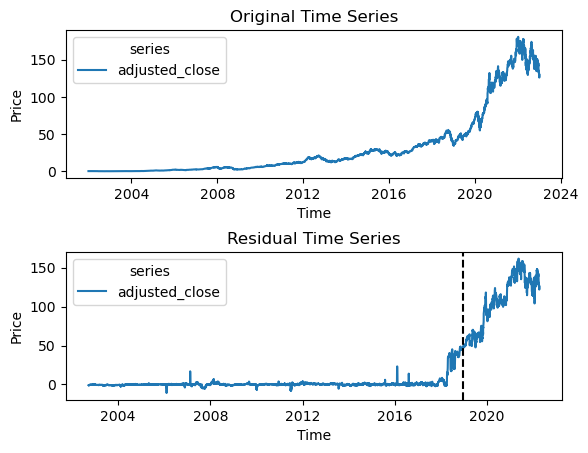

In [6]:
model_performance.plot_residuals()

In [7]:
ol_detection = ol_algo.IterativeTtestOutlierDetection(
    types= pd.DataFrame({'type': ['AO', 'IO', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC'], 'delta': [0, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}),
    maxit=4,
    maxit_iloop=4,
    maxit_oloop=4,
    cval=None,
    cval_reduce=0.14286,
    discard_method='bottom-up',
    discard_cval=3.5,
    tsmethod='ARIMA',
    args_tsmethod={
        "order": (1,1,1),
        "seasonal_order": (0, 0, 0, 0),
        "with_intercept": True
    }
)

In [8]:
ol_detection_result = ol_detection.fit(endog=pd.concat((model_performance.training_residuals, model_performance.testing_residuals))['adjusted_close'], exog=None)

C:\Users\carlo\GitHub\ProjectBuffalo\buffalo\algorithm\outliers.py:675: UserWarning: Maximum number of iterations reached for inner loop.
  warn('Maximum number of iterations reached for inner loop.')
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
c:\Users\carlo\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self.

In [11]:
ol_detection_result.serialize_to_file(sql_path=r'cached_data/ol_detection_result.sqlite', dataset_name=f'testing_id_{testing_id}', algo_name='VC not included')

AttributeError: 'IterativeTtestOutlierDetectionResult' object has no attribute 'dataset'

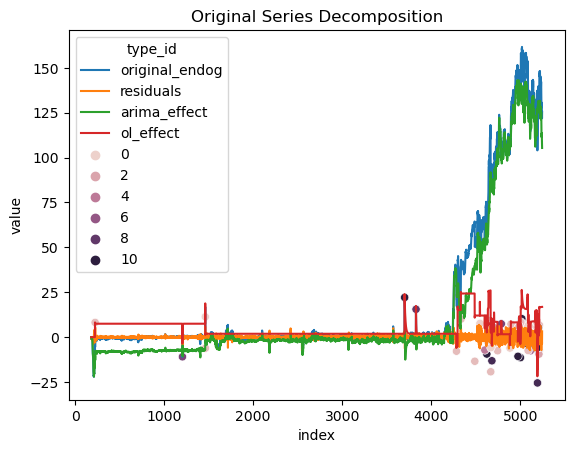

In [14]:
ol_detection_result.plot_series_decomposition()

In [ ]:
ol_detection_result.located_ol